# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint
## Not for grades

## Learning Objective

The objective of this experiment is to understand Decision Tree classifier.

## Dataset

The dataset chosen for this  experiment is a handmade fruits dataset. The dataset contains 60 records. Each record represents the following details of fruits : 

*  Weight -   It is the mass of an object. With respect to this dataset, we have calculated the weights in grams 

* Sphericity -  is a measure of how closely the shape of an object approaches that of a mathematically perfect sphere.

*  Color -  Every fruit has a different color at different stages. You can encode the color to an integer value. For example

     - Orange as 22
     - Greenish Yellow as 23
     - Green as 24
     - Red as 25
     - Reddish Yellow as 26

*  Label -   We have considered two fruits for simplicity. They are Apple and Orange.




### Setup Steps

#### Importing Required Packages

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import os

#### Loading the data

In [0]:
def labels_converter(s):
  s = s.lower()
  if s == "orange":
    return 0
  if s == "apple":
    return 1
  return -1

In [0]:
def color_converter(s):
  s = s.lower()
  if s == 'green':
    return 20 #Could you try 25,26,27,28,29 instead of 20,40,60,80,100? Is it causing a dip in accuracy? Could you reason why?
  if s == 'greenish yellow':
    return 40
  if s == 'orange':
    return 60
  if s == 'red':
    return 80
  if s == 'reddish yellow':
    return 100
  return -1

In [0]:
import pandas as pd
fruits_data = pd.read_csv("fruits_weight_sphercity.csv",converters={"labels":labels_converter,"Color":color_converter})

To get better understanding of the data let us visualize first five rows of the data using head () and last five rows of the data using tail()

In [0]:
fruits_data.head()

,Color,Weight,Sphericity,labels
0,80,200,0.40,1
1,60,320,1.00,0
2,60,310,0.95,0
3,80,220,0.45,1
4,80,230,0.50,1


In [0]:
fruits_data.tail()

,Color,Weight,Sphericity,labels
64,80,200,0.43,1
65,80,200,0.49,1
66,80,200,0.42,1
67,80,201,0.40,1
68,80,202,0.40,1


In [0]:
# Storing data and labels in two seperate variables
data = fruits_data[["Weight","Color","Sphericity"]] 
labels = fruits_data["labels"]

### Splitting the data into train and test sets 

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
 # Training and testing set ratio is 70 : 30
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.33, random_state=42)

In [0]:
# Let us see the size of train and  test sets
X_train.shape, X_test.shape

((46, 3), (23, 3))

In [0]:
# Let us see first five rows of the training data

X_train[:5]

,Weight,Color,Sphericity
28,330,20,0.89
7,330,40,0.98
61,344,20,0.68
40,204,80,0.40
50,272,60,0.80


### Training a Decision Tree Classifier 

In [0]:
decision_tree = DecisionTreeClassifier()

In [0]:
# Training or fitting the model with the train data
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
# Testing the trained model
decision_tree.predict(X_test)

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [0]:
# Calculating the score
decision_tree.score(X_test,y_test)

0.8260869565217391

In [0]:
# Exporting the model into a dot file
graph = graphviz.Source(export_graphviz(decision_tree, out_file="tree.dot"
       , feature_names=["Weight","Color","Sphericity"], class_names=['0', '1'] 
       , filled = True))
os.system("dot -T png -o " + " tree.png" + " " + "tree.dot")

0

In [0]:
!ls

05_DT_Fruits_data.ipynb      sample_data  tree.png
fruits_weight_sphercity.csv  tree.dot


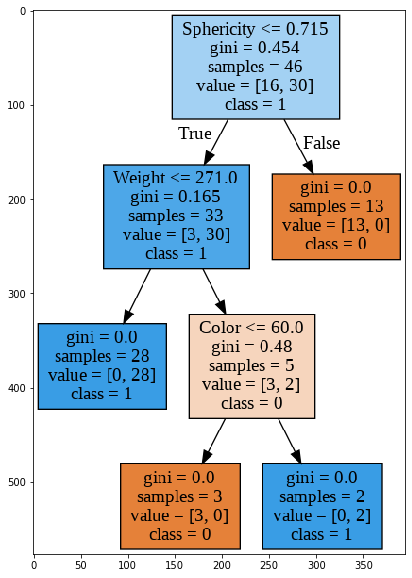

In [0]:
plt.figure(figsize=(10,10))
plt.imshow(plt.imread("tree.png"))
plt.grid(False)